In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]][50:]
y = iris.target[50:]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [70]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def visualize_boundary_of_classifier(clf_model):
    clf = Pipeline(
        steps=[
            ("scaler", StandardScaler()), 
            ("clf", clf_model)
        ]
    )
    
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)

    disp = DecisionBoundaryDisplay.from_estimator(
        clf, 
        X, 
        response_method="predict",
        xlabel=iris.feature_names[0], 
        ylabel=iris.feature_names[1],
        alpha=0.5,
        cmap=plt.cm.RdBu
    )
    disp.ax_.scatter(
        X.iloc[:, 0], 
        X.iloc[:, 1], 
        c=y,
        edgecolor="k",
        cmap=plt.cm.RdBu #ListedColormap(["#FF0000", "#0000FF"])
    )

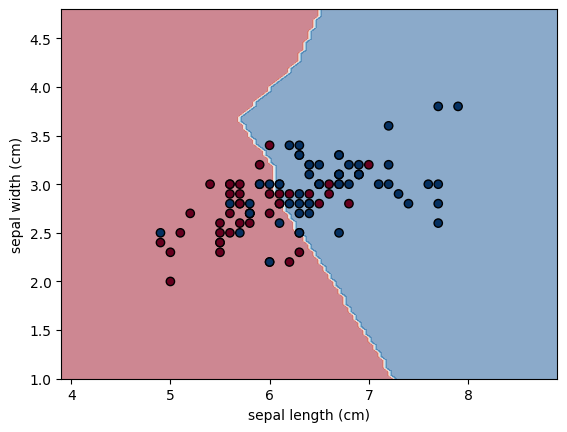

In [79]:
from sklearn.neural_network import MLPClassifier
visualize_boundary_of_classifier(MLPClassifier(alpha=0.0, hidden_layer_sizes=(10,), max_iter=1000, random_state=42))

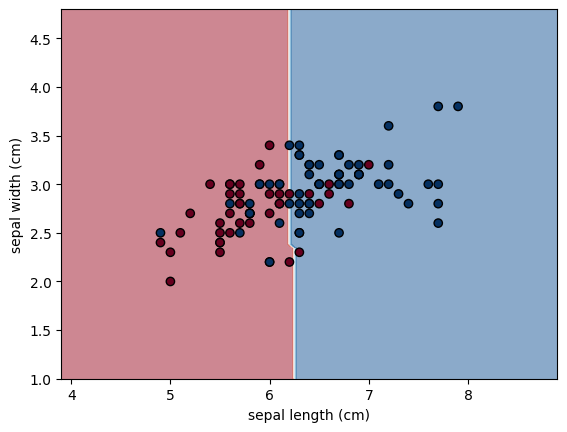

In [75]:
from sklearn.linear_model import LogisticRegression
visualize_boundary_of_classifier(LogisticRegression(penalty=None,random_state=42))

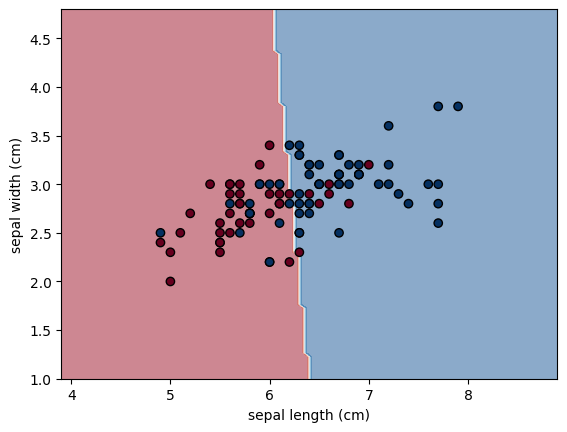

In [78]:
from sklearn.linear_model import LogisticRegression
visualize_boundary_of_classifier(LogisticRegression(penalty='l2',random_state=42))